# Sprint6課題　機械学習スクラッチ

### インポート

In [219]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [418]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [425]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

### データセット

In [2]:
##シンプルデータセット1作成コード
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [102]:
##アイリスのデータセット
from sklearn.datasets import load_iris
a = load_iris()
import pandas as pd
X_i = pd.DataFrame(a.data,columns=["sepal_length","sepal_width","petal_length","petal_width"])
y_i = pd.DataFrame(a.target,columns=["Species"])

df = pd.concat([X_i,y_i],axis=1)
df_12 =df[df['Species'].isin([1,2])]

X_i =df_12.drop("Species", axis=1).values
X_i = X_i[:,:2]
y_i = df_12.Species.values

In [231]:
#アイリス
#X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i,y_i,test_size=0.25,shuffle = True)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(sp_pe_len_i,y_i,test_size=0.25,shuffle = True)

In [217]:
print(y_train_i)

[1 2 2 1 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 2 2 1 2
 1 1 1 1 1 1 2 1 2 2 1 1 1 2 2 1 1 2 1 2 2 1 2 1 2 2 1 2 1 2 1 2 2 2 1 1 2
 1]


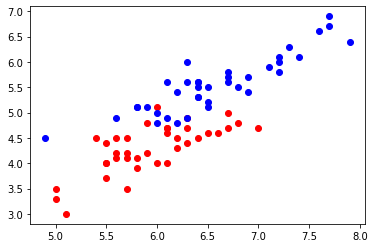

In [232]:
plt.plot(X_train_i[y_train_i == 1][:, 0], X_train_i[y_train_i == 1][:, 1], 'ro')
plt.plot(X_train_i[y_train_i == 2][:, 0], X_train_i[y_train_i == 2][:, 1], 'bo')
plt.show()

In [230]:
#データセット調整
sepal_length =  df_12.iloc[:,0]
spetal_width = df_12.iloc[:,1]
petal_length = df_12.iloc[:,2]
petal_width =  df_12.iloc[:,3]

sp_pe_len = pd.concat([sepal_length,petal_length],axis=1)
sp_pe_len_i =sp_pe_len.values

## 【問題1】ジニ不純度を求める関数

In [6]:
#クラスを変数に入れる
a = 1
b = -1

In [3]:
#yの総数を抽出
y_len = len(y)

In [8]:
#クラスaの総数抽出
y_a_len = len(y[y==a])
#クラスbの総数抽出
y_b_len = len(y[y==b])

In [9]:
#ジニ計数算出
jini = 1-(((y_a_len/y_len)**2)+((y_b_len/y_len)**2))

In [10]:
print(jini)

0.5


In [12]:
#Yのユニークな値を取得してみる
uni = np.unique(y)

In [14]:
#Yのユニークな値を取得してからクラスを変数に入れてみる
aa = y[uni[0]]
print(aa)

-1


In [35]:
#クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
y_2 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [38]:
#クラスのの数を取ってくる
y_2_uni = np.unique(y_2)
print(y_2_uni)
print(y_2_uni[0])

[-1  0  1]
-1


In [42]:
#クラスの数のリストを作る
y_class_num = np.arange(len(y_2_uni))
np.put(y_pre_k,[i],[1])

In [46]:
#要素ごとに集計する
for i in range(len(y_2_uni)):
    np.put(y_class_num,[i],len(y_2[y_2==y_2_uni[i]]))

In [47]:
print(y_class_num)

[15 15 15]


In [45]:
#要素で集約のために外だし
len(y_2[y_2==y_2_uni[0]])

15

In [48]:
#総数
y_2_len = len(y_2)

In [68]:
#jinini初期化
jinini = 0

In [70]:
#求めた総数の各要素のジニ係数を出す
#ジニ計数算出
#jini = 1-(((y_a_len/y_len)**2)+((y_b_len/y_len)**2))

#for i in range(3):
for i in range(len(y_class_num)):
    jinini += (len(y_2[y_2==y_2_uni[i]])/y_2_len)**2
jinini =1-jinini

In [73]:
jinini =1-jinini

In [74]:
print(jinini)

0.6666666666666667


In [56]:
len(y_2[y_2==y_2_uni[i]])
#/y_2_len

15

In [61]:
(15/45)
#**2*3

0.3333333333333333

In [62]:
(len(y_2[y_2==y_2_uni[0]])/y_2_len)**2

0.1111111111111111

#### ジニ計数の関数作成

In [75]:
def jini(y):
    #jini初期化
    jini = 0
    #総数
    y_len = len(y)
    #クラスの数取得
    y_uni = np.unique(y)
    
    for i in range(len(y_uni)):
        jini += (len(y[y==y_uni[i]])/y_len)**2
    jini =1-jini
    
    return jini

In [76]:
jini(y_2)

0.6666666666666667

In [77]:
jini(y)

0.5

## 【問題2】情報利得を求める関数

#### 検証データ作成

In [85]:
oya_a = np.zeros(30)
oya_b = np.ones(35)

In [86]:
y_oya=np.hstack((oya_a,oya_b))

In [87]:
left_a = np.zeros(10)
left_b = np.ones(30)

In [88]:
y_left = np.hstack((left_a,left_b))

In [91]:
rigth_a = np.zeros(20)
rigth_b = np.ones(5)

In [92]:
y_rigth = np.hstack((rigth_a,rigth_b))

In [97]:
#親、左、右の総数算出
y_oya_len = len(y_oya)
y_left_len = len(y_left)
y_rigth_len = len(y_rigth)

#### 検証データで実証

In [93]:
#親のジニ計数
jini_oya = jini(y_oya)

In [94]:
#左のジニ計数
jini_left = jini(y_left)

In [95]:
#右のジニ計数
jini_rigth = jini(y_rigth)

In [98]:
#サンプルの情報利得
I= jini_oya-y_left_len/y_oya_len*jini_left-y_rigth_len/y_oya_len*jini_rigth

In [99]:
print(I)

0.14319526627218937


#### 関数化

In [100]:
def jyouhou(y_oya,y_left,y_rigth):
    #それぞれの数算出
    y_oya_len = len(y_oya)
    y_left_len = len(y_left)
    y_rigth_len = len(y_rigth)
    #jini関数を利用してそれぞれのジニ計数算出
    jini_oya = jini(y_oya)
    jini_left = jini(y_left)
    jini_rigth = jini(y_rigth)
    #情報利得算出
    j_r= jini_oya-y_left_len/y_oya_len*jini_left-y_rigth_len/y_oya_len*jini_rigth
    return j_r

In [101]:
jyouhou(y_oya,y_left,y_rigth)

0.14319526627218937

## 【問題3】深さ1の決定木分類器クラスの作成

### クラス作成

In [438]:
class ScratchDecesionTreeClassifier():
    
    def __init__(self):
        # ハイパーパラメータを属性として記録
        #self.iter = num_iter
        #self.lr = lr
        #self.bias = bias
        #self.verbose = verbose
        # 損失を記録する配列を用意
        #self.loss = np.zeros(self.iter)
        #self.val_loss = np.zeros(self.iter)
        pass

    def _jini(self,y):
        jini = 0
        #総数
        y_len = len(y)
        #yのクラスの数
        y_uni = np.unique(y)
        
        for i in range(len(y_uni)):
            jini += (len(y[y==y_uni[i]])/y_len)**2
        jini =1-jini
        return jini
    
    def _jyouhou(self,y_oya,y_left,y_rigth):
        #それぞれの数算出
        y_oya_len = len(y_oya)
        y_left_len = len(y_left)
        y_rigth_len = len(y_rigth)
        #jini関数を利用してそれぞれのジニ計数算出
        jini_oya = self._jini(y_oya)
        jini_left = self._jini(y_left)
        jini_rigth = self._jini(y_rigth)
        #情報利得算出
        j_r= jini_oya-y_left_len/y_oya_len*jini_left-y_rigth_len/y_oya_len*jini_rigth
        return j_r
    
    def _jyouhou_list(self,X,y):
        #情報利得を格納するリスト作る
        #リスト初期化
        X_jini_list = []
        
        #縦と横に繰り返す
        for k in range(self.X_train_i_hen):
            for i in range(self.X_train_i_len):
                #右と仮定し
                m = np.hstack((y[X[:,k] > X[i,k]],y[X[:,k] == X[i,k]]))
                #左と仮定しyを出す
                n = y[X[:,k]<X[i,k]]  
                j= self._jyouhou(y,m,n)
                X_jini_list.append(j)
                print(j)
                
        return X_jini_list

    def _jyouhou_list_get(self,X_jini_list):
        
        #情報利得のリストの変形
        #リストをまず各特徴量ごとに区切って、転置しXの配列に合わせる
        bb = np.reshape(X_jini_list,[self.X_train_i_hen,self.X_train_i_len])
        cc = bb.T
        
        #配列から最大値をとる
        max_cc = np.where(cc == np.amax(cc))        
        #Xの最大値の配列の1つを取ってくる
        max_cc_one = max_cc[0][0], max_cc[1][0]
        
        return max_cc_one
    
    
    def _get_class_and_border(self,X,y,X_max_hai_one):
        
        #Xの閾値の値取得
        X_border = X[X_max_hai_one]
        #閾値以上の条件を作る
        y_left = X[:,X_max_hai_one[1]] > X_border
        #閾値以上のXとyを入れる
        X_leff = X[y_left==True]
        Y_leff = X[y_left==True]
        #print(X_leff)
        #閾値以上のY＝0を出す
        #閾値以上のクラスをカウントして多数決
        Y0_left = len(Y_leff[Y_leff==self.y_uni[0]])
        Y1_left = len(Y_leff[Y_leff==self.y_uni[1]])
        
        #どちらのラベルかを確認する
        if Y0_left>Y1_left:
            left_class = self.y_uni[0]
            right_class = self.y_uni[1]
        else:
            left_class = self.y_uni[1]
            right_class = self.y_uni[0]
        
        return left_class,right_class,X_border

    
    def fit(self, X, y):
        #この3つセルフいらない？
        #まずサンプル数の長さ
        self.X_train_i_len = len(X)
        #変数の数をとる
        self.X_train_i_hen = X.shape[1]
        #クラスの数取得
        self.y_uni = np.unique(y)

        #情報利得の関数でリスト取得
        X_jini_list = self._jyouhou_list(X,y)
        
        #情報利得の関数で最大値のXの配列を取得(:,:)のタプル
        self.X_max_hai_one = self._jyouhou_list_get(X_jini_list)
        
        #クラスとXのボーダー取得
        self.left_class,self.right_class,self.X_border = self._get_class_and_border(X,y,self.X_max_hai_one)        
                  
        return self.left_class,self.right_class,self.X_border,X_jini_list,self.X_max_hai_one
    
    def predict(self,X):
        #予測
        y_test_left = X[:,self.X_max_hai_one[1]] > self.X_border
        #条件で値変換
        y_pred = np.where(y_test_left==True,self.left_class,self.right_class)
        return y_pred

In [ ]:
                #確認用
                print("m",m)
                print("n",n)
                print("j",j) 
                print("X_jini_list",X_jini_list)
                print("i",i)
                print("k",k)

###  インスタンス化
 

In [439]:
sdt = ScratchDecesionTreeClassifier()

In [448]:
a,b,c,d,e = sdt.fit(X_train_i,y_train_i)

0.07488547008546997
0.06479999999999991
0.08871435654721642
0.10084952753339838
0.05220226082161557
0.08871435654721642
0.09689546388493742
0.07849267139479887
0.06637575757575737
0.006577777777777627
0.09709905946118275
0.06417777777777772
0.050669488536154994
0.07849267139479887
0.07849267139479887
0.06417777777777772
0.10084952753339838
0.10084952753339838
0.05220226082161557
0.07849267139479887
0.04232657004830909
0.08871435654721642
0.09689546388493742
0.04267205387205367
0.07849267139479887
0.09709905946118275
0.020281481481481234
0.09689546388493742
0.020281481481481234
0.07775943562610219
0.07775943562610219
0.0727150813344361
0.013434920634920515
0.027422848200312766
0.09689546388493742
0.0837673202614378
0.013434920634920515
0.06257777777777773
0.006577777777777627
0.002503703703703456
0.013434920634920515
0.06257777777777773
0.09709905946118275
0.03476825396825384
0.06637575757575737
0.06257777777777773
0.06637575757575737
0.09689546388493742
0.013434920634920515
0.007422848

In [441]:
print(a)
print(b)
print(c)
print(d)
print(e)

2
1
4.8
[0.07488547008546997, 0.06479999999999991, 0.08871435654721642, 0.10084952753339838, 0.05220226082161557, 0.08871435654721642, 0.09689546388493742, 0.07849267139479887, 0.06637575757575737, 0.006577777777777627, 0.09709905946118275, 0.06417777777777772, 0.050669488536154994, 0.07849267139479887, 0.07849267139479887, 0.06417777777777772, 0.10084952753339838, 0.10084952753339838, 0.05220226082161557, 0.07849267139479887, 0.04232657004830909, 0.08871435654721642, 0.09689546388493742, 0.04267205387205367, 0.07849267139479887, 0.09709905946118275, 0.020281481481481234, 0.09689546388493742, 0.020281481481481234, 0.07775943562610219, 0.07775943562610219, 0.0727150813344361, 0.013434920634920515, 0.027422848200312766, 0.09689546388493742, 0.0837673202614378, 0.013434920634920515, 0.06257777777777773, 0.006577777777777627, 0.002503703703703456, 0.013434920634920515, 0.06257777777777773, 0.09709905946118275, 0.03476825396825384, 0.06637575757575737, 0.06257777777777773, 0.066375757575757

In [442]:
ypre = sdt.predict(X_test_i)

In [443]:
print(ypre)
print(y_test_i)

[1 1 1 2 1 1 2 2 1 1 1 2 2 2 1 2 1 2 2 2 1 2 1 2 2]
[1 1 1 2 1 1 1 2 1 1 1 2 2 2 1 2 1 2 2 2 1 2 1 2 2]


In [105]:
#アイリス
#X_train_i, X_test_i, y_train_i, y_test_i 

In [108]:
#X[0,1]の値を閾値にしてyの数を特定してみる
#print(X_train_i)
print(X_train_i[1,0])

6.0


In [124]:
#右と仮定しyを出す
#X_train_i[1,0]が条件
m = np.hstack((y_train_i[X_train_i[:,0] > X_train_i[1,0]],y_train_i[X_train_i[:,0] == X_train_i[1,0]]))
#左と仮定しyを出す
n = y_train_i[X_train_i[:,0]<X_train_i[1,0]]
#
print(m)

[2 2 2 2 2 2 1 2 1 1 2 2 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 1 2 1 2 2 1 1 1 1 2
 1 2 2 2 2 1 2 2 2 2 2 1 1 1 2 1]


In [125]:
#ちゃんと分けられているのか確認
print(len(y_train_i))
print(len(X_train_i))
print(len(m))
print(len(n))

75
75
53
22


In [128]:
#配列から最大値をとる
print(np.amax(X_train_i))

7.9


### 個別計算：情報利得のリスト取得

In [162]:
#変数の数をとる
X_train_i_hen = X_train_i.shape[1]
print(X_train_i_hen)

2


In [413]:
#まずサンプル数とる
X_train_i_len = len(X_train_i)
#リスト初期化
X_jini_list = []
#縦と横に繰り返す
for k in range(X_train_i_hen):
    for i in range(X_train_i_len):
        m = np.hstack((y_train_i[X_train_i[:,k] > X_train_i[i,k]],y_train_i[X_train_i[:,k] == X_train_i[i,k]]))
        #左と仮定しyを出す
        n = y_train_i[X_train_i[:,k]<X_train_i[i,k]]  
        print("m",m)
        print("n",n)
        j= jyouhou(y_train_i,m,n)
        print("j",j) 
        #けたが落ちる・・・
        #j *= 100000
        #print("j100",j)
        X_jini_list.append(j)
        #np.put(Xcop,[i,k] ,[j])
        #print("Xcop",Xcop)
        print("X_jini_list",X_jini_list)
        print("i",i)
        print("k",k)

m [2 2 2 2 2 2 2 2 2 2]
n [1 1 2 1 2 1 2 1 2 1 1 1 2 2 1 1 2 1 2 1 1 1 2 1 1 2 1 1 2 1 2 1 1 1 2 2 1
 2 1 1 2 2 2 1 1 2 1 2 1 2 1 2 2 1 1 1 2 2 1 2 1 1 2 2 1]
j 0.07488547008546997
X_jini_list [0.07488547008546997]
i 0
k 0
m [2 2 2 2 2 2 2 2 2 2 2 2 1 1 2]
n [1 2 1 2 1 2 1 2 1 1 1 2 2 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 2 1 2 1
 1 2 2 2 1 1 2 1 1 2 1 2 2 1 1 2 2 1 1 1 2 2 1]
j 0.06479999999999991
X_jini_list [0.07488547008546997, 0.06479999999999991]
i 1
k 0
m [2 1 2 1 2 2 2 1 2 1 1 1 2 2 1 2 2 2 1 1 2 2 2 1 1 2 2 1 2 2 2 2 2 2 1 2 2
 2 2 2 1 2 2 2 1 1 1 2 2 1 2 1 2 1 1 2 1 2]
n [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2]
j 0.08871435654721642
X_jini_list [0.07488547008546997, 0.06479999999999991, 0.08871435654721642]
i 2
k 0
m [2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 2 2 2 1 2 2 2]
n [1 1 2 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 2 2 1
 1 2 2 1 1 2 1]
j 0.10084952753339838
X_jini_list [0.07488547008546997, 0.06479999999999991, 0.08871435654721642, 0.100849527

In [ ]:
c = np.reshape(X_jini_list,[3,30])

### 情報利得のリストをXの配列にして最大値とる

In [286]:
a = np.arange(90)
#print(a)
b = np.reshape(a,[3,30])
bb = np.reshape(X_jini_list,[X_train_i_hen,X_train_i_len])
#print(b)
#print(b.T)

In [447]:
#リストをまず各特徴量ごとに区切って、転置しXの配列に合わせる
#bb = np.reshape(X_jini_list,[X_train_i_hen,X_train_i_len])
#print(bb)
#cc = bb.T
#print(cc)
#print(d)

In [415]:
#配列から最大値をとる
print(np.amax(cc))
#max_cc=np.amax(cc)
max_cc = np.where(cc == np.amax(cc))
#np.where(max_cc)
print(max_cc)

0.3565922077922077
(array([ 1, 30, 35, 66]), array([1, 1, 1, 1]))


In [416]:
#配列を取ってくる
max_cc_one = max_cc[0][0], max_cc[1][0]
print(max_cc_one)

(1, 1)


In [417]:
#配列をとる（鈴木さんアドバイス)（速度早いやり方)
#この取り方だと、情報利得のリストをXに合わせる必要がなさそう
tmp = np.argmax(cc)
tmp = tmp //cc.shape[1], tmp%cc.shape[1]
print(tmp)

(1, 1)


In [272]:
np.argmax(cc, axis=1)

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [270]:
cc.max()

0.3565922077922077

In [289]:
#取得した配列からXの閾値をとる
X_train_i[tmp]
X_train_i[max_cc_one]

4.8

In [261]:
np.arange(6).reshape(2,3) >= 4

array([[0, 1, 2],
       [3, 4, 5]])

In [257]:
print(max_cc[0])

[ 1 30 35 66]


In [238]:
#情報・・の最大値のXをとる
sb_X = X_train_i[max_cc]
print(sb_X)

[4.8 4.8 4.8 4.8]


In [245]:
#print(X_train_i)
#print(X_train_i[39,:])
np.where(X_train_i == 4.8)

(array([ 1, 30, 35, 66]), array([1, 1, 1, 1]))

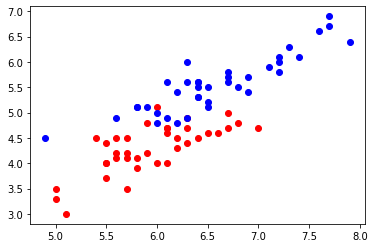

In [246]:
#トレインデータ
plt.plot(X_train_i[y_train_i == 1][:, 0], X_train_i[y_train_i == 1][:, 1], 'ro')
plt.plot(X_train_i[y_train_i == 2][:, 0], X_train_i[y_train_i == 2][:, 1], 'bo')
plt.show()

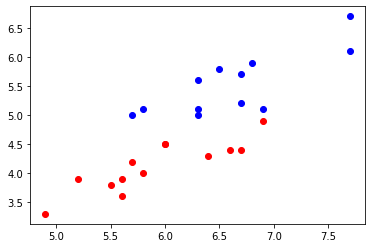

In [284]:
#テストデータ
plt.plot(X_test_i[y_test_i == 1][:, 0], X_test_i[y_test_i == 1][:, 1], 'ro')
plt.plot(X_test_i[y_test_i == 2][:, 0], X_test_i[y_test_i == 2][:, 1], 'bo')
plt.show()

### わけた時のクラスを取得する

In [294]:
#予測のために、閾値でトレインデータを分けたときにどちらのラベルが多いのか多数決でラベルを決める

#Yのクラスの数を取得
y_uni = np.unique(y_train_i)

#配列
#tmp
#閾値
#X_train_i[tmp]

#for i in range(len(y_uni)):
a=len(y_train_i[y_train_i==y_uni[0]][X_train_i)
print(a)

37


In [358]:
#多数決の流れを一つずつ

#閾値以上の条件を作る
y_left = X_train_i[:,tmp[1]] > X_train_i[tmp]
#閾値以上のXとyを入れる
X_leff = X_train_i[y_left==True]
Y_leff = y_train_i[y_left==True]
#print(X_leff)
#閾値以上のY＝0を出す
print(Y_leff[Y_leff==y_uni[0]])
print(Y_leff[Y_leff==y_uni[1]])
#閾値以上のクラスをカウントして多数決
Y0_left = len(Y_leff[Y_leff==y_uni[0]])
Y1_left = len(Y_leff[Y_leff==y_uni[1]])

 #どちらのラベルかを決定する
if Y0_left>Y1_left:
    left_class = y_uni[0]
    right_class = y_uni[1]
else:
    left_class = y_uni[1]
    right_class = y_uni[0]
    
print(left_class)
print(right_class)

[1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
2
1


### 予測

In [363]:
#予測
y_test_left = X_test_i[:,tmp[1]] > X_train_i[tmp]
#Y_test_leff = y_test_i[y_test_left==True]
print(y_test_left)

#条件で値変換
np.where(y_test_left==True,left_class,right_class)

[False False False  True False False  True  True False False False  True
  True  True False  True False  True  True  True False  True False  True
  True]


array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 2])

In [393]:
y_pred = np.where(y_test_left==True,left_class,right_class)
print(y_pred)

[1 1 1 2 1 1 2 2 1 1 1 2 2 2 1 2 1 2 2 2 1 2 1 2 2]


In [300]:
X_train_i[tmp]

4.8

In [356]:
#X_train_i[:,tmp[1]] > X_train_i[tmp]

In [355]:
#y_train_i[y_train_i==y_uni[0]],[X_train_i[:,tmp[1]] > X_train_i[tmp]]

In [350]:
#print(X_train_i)

In [325]:
#閾値以上のy０
y_left_y0 = y_left[y_train_i==y_uni[0]]

In [331]:
print(y_left_y0[y_left_y0==True])

[ True  True  True]


In [326]:
#閾値以上のy０数
len(y_left_y0)

37

In [333]:
#一つで条件作りたかったが動かない
#y_train_i[y_train_i==y_uni[0][X_train_i[:,tmp[1]] > X_train_i[tmp] == True]]

### 動くものをキープ

In [ ]:
class ScratchDecesionTreeClassifier_k():
    
    def __init__(self):
        # ハイパーパラメータを属性として記録
        #self.iter = num_iter
        #self.lr = lr
        #self.bias = bias
        #self.verbose = verbose
        # 損失を記録する配列を用意
        #self.loss = np.zeros(self.iter)
        #self.val_loss = np.zeros(self.iter)
        pass

    def _jini(self,y):
        jini = 0
        #総数
        y_len = len(y)
        #yのクラスの数
        y_uni = np.unique(y)
        
        for i in range(len(y_uni)):
            jini += (len(y[y==y_uni[i]])/y_len)**2
            jini =1-jini
        return jini
    
    def _jyouhou(self,y_oya,y_left,y_rigth):
        #それぞれの数算出
        y_oya_len = len(y_oya)
        y_left_len = len(y_left)
        y_rigth_len = len(y_rigth)
        #jini関数を利用してそれぞれのジニ計数算出
        jini_oya = self._jini(y_oya)
        jini_left = self._jini(y_left)
        jini_rigth = self._jini(y_rigth)
        #情報利得算出
        j_r= jini_oya-y_left_len/y_oya_len*jini_left-y_rigth_len/y_oya_len*jini_rigth
        return j_r
    
    def _jyouhou_list(self,X,y):
        #情報利得を格納するリスト作る
        #リスト初期化
        X_jini_list = []
        
        #縦と横に繰り返す
        for k in range(self.X_train_i_hen):
            for i in range(self.X_train_i_len):
                #右と仮定し
                m = np.hstack((y[X[:,k] > X[i,k]],y[X[:,k] == X[i,k]]))
                #左と仮定しyを出す
                n = y[X[:,k]<X[i,k]]  
                j= self._jyouhou(y,m,n)
                X_jini_list.append(j)
                
        return X_jini_list

    def _jyouhou_list_get(self,X_jini_list):
        
        #情報利得のリストの変形
        #リストをまず各特徴量ごとに区切って、転置しXの配列に合わせる
        bb = np.reshape(X_jini_list,[self.X_train_i_hen,self.X_train_i_len])
        cc = bb.T
        
        #配列から最大値をとる
        max_cc = np.where(cc == np.amax(cc))        
        #Xの最大値の配列の1つを取ってくる
        max_cc_one = max_cc[0][0], max_cc[1][0]
        
        return max_cc_one
    
    
    def _get_class_and_border(self,X,y,X_max_hai_one):
        
        #Xの閾値の値取得
        X_border = X[X_max_hai_one]
        #閾値以上の条件を作る
        y_left = X[:,X_max_hai_one[1]] > X_border
        #閾値以上のXとyを入れる
        X_leff = X[y_left==True]
        Y_leff = X[y_left==True]
        #print(X_leff)
        #閾値以上のY＝0を出す
        #閾値以上のクラスをカウントして多数決
        Y0_left = len(Y_leff[Y_leff==self.y_uni[0]])
        Y1_left = len(Y_leff[Y_leff==self.y_uni[1]])
        
        #どちらのラベルかを確認する
        if Y0_left>Y1_left:
            left_class = self.y_uni[0]
            right_class = self.y_uni[1]
        else:
            left_class = self.y_uni[1]
            right_class = self.y_uni[0]
        
        return left_class,right_class,X_border

    
    def fit(self, X, y):
        #この3つセルフいらない？
        #まずサンプル数の長さ
        self.X_train_i_len = len(X)
        #変数の数をとる
        self.X_train_i_hen = X.shape[1]
        #クラスの数取得
        self.y_uni = np.unique(y)

        #情報利得の関数でリスト取得
        X_jini_list = self._jyouhou_list(X,y)
        
        #情報利得の関数で最大値のXの配列を取得(:,:)のタプル
        self.X_max_hai_one = self._jyouhou_list_get(X_jini_list)
        
        #クラスとXのボーダー取得
        self.left_class,self.right_class,self.X_border = self._get_class_and_border(X,y,self.X_max_hai_one)        
                  
        return self.left_class,self.right_class,self.X_border,X_jini_list,self.X_max_hai_one
    
    def predict(self,X):
        #予測
        y_test_left = X[:,self.X_max_hai_one[1]] > self.X_border
        #条件で値変換
        y_pred = np.where(y_test_left==True,self.left_class,self.right_class)
        return y_pred

## 【問題6】指標値の算出

In [444]:
#アイリスデータ2
print(accuracy_score(y_test_i, ypre))
print(precision_score(y_test_i, ypre))
print(recall_score(y_test_i, ypre))
print(f1_score(y_test_i, ypre))
print(confusion_matrix(y_test_i, ypre))

0.96
1.0
0.9230769230769231
0.9600000000000001
[[12  1]
 [ 0 12]]


## 【問題7】決定領域の可視化

In [428]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    #plt.scatter(sb_X[:, 0],sb_X[:, 1],color='y',marker='o')
    plt.show()

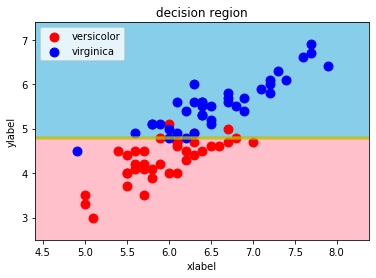

In [445]:
decision_region(X=X_train_i, y=y_train_i, model=sdt)

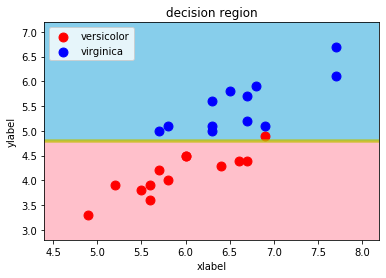

In [446]:
decision_region(X=X_test_i, y=y_test_i, model=sdt)

## 【問題8】決定木の利用場面

決定木が他の手法に比べて有効だと考えられるのはどういった場面か

・ラベルごとのデータは固まっている(傾向がある)が、塊？偏り？が複数に渡る場合。  
・ある特徴量の数値をもとに分類できる場合。  